### **Topic**: Project: Predicting Calories Burnt During a Workout Session

**Objective**: The goal of this project is to analyze the provided dataset, perform Exploratory Data Analysis (EDA) to uncover insights, and build a linear regression model to predict the number of calories burnt during a workout session.

**Project Requirements**
- Data Understanding and Cleaning
- Exploratory Data Analysis (EDA)
- Feature Engineering and Selection
- Linear Regression Model

Importing the neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv')

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


# Data Understanding

In [ ]:
df.shape

(15000, 9)

The data set contains fifteen thousand rows and 9 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


All columns are the the appropriate data types

In [ ]:
#Checking for missing data

df.isna().sum().sort_values(ascending=False)

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
#checking for duplicates

df.duplicated().sum()

np.int64(0)

There are no missing nor duplicated values


## Feature Engineering

In [ ]:
df.Age

,Age
0,68
1,20
2,69
3,34
4,27
...,...
14995,20
14996,27
14997,43
14998,78


In [ ]:
#I WANT TO CREATE AGE GROUP (Classifying the Age

bins= [0,9,25,40,75,100]
labels = ['Gen_Alpha', 'Gen_Z', 'Millenial', 'Gen_X', 'Baby_Boomers']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X
3,16180408,female,34,179,71,13,100,40.5,71,Millenial
4,17771927,female,27,154,58,10,81,39.8,35,Millenial


In [ ]:
df['Height'].max()

222

In [ ]:
df['Height'].min()

123

In [ ]:
#Classifying the Heights

bins= [0,155,165,175,185,300]
labels = ['Short', 'Below_Average', 'Average', 'Above_Average', 'Tall']

df['Height_Class'] = pd.cut(df['Height'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X,Tall
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z,Average
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average
3,16180408,female,34,179,71,13,100,40.5,71,Millenial,Above_Average
4,17771927,female,27,154,58,10,81,39.8,35,Millenial,Short


In [ ]:
#Classifying the Weight

df['Weight'].min()
df['Weight'].max()

bins= [0,35,75,100,150]
labels = ['Under_Weight', 'Normal_Weight', 'Over_Weight', 'Obese']

df['Weight_Class'] = pd.cut(df['Weight'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class,Weight_Class
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X,Tall,Over_Weight
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z,Average,Normal_Weight
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average,Over_Weight
3,16180408,female,34,179,71,13,100,40.5,71,Millenial,Above_Average,Normal_Weight
4,17771927,female,27,154,58,10,81,39.8,35,Millenial,Short,Normal_Weight


In [ ]:
#Classifying the Body_Temperature

df['Body_Temp'].max()
df['Body_Temp'].min()

bins= [0,37.0,40.0,50.0]
labels = ['Hypothermia', 'Normal', 'Fever']

df['Body_Temp_Class'] = pd.cut(df['Body_Temp'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class,Weight_Class,Body_Temp_Class
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X,Tall,Over_Weight,Fever
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z,Average,Normal_Weight,Fever
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average,Over_Weight,Normal
3,16180408,female,34,179,71,13,100,40.5,71,Millenial,Above_Average,Normal_Weight,Fever
4,17771927,female,27,154,58,10,81,39.8,35,Millenial,Short,Normal_Weight,Normal


In [ ]:
#Classifying the Heart_Rate

df['Heart_Rate'].min()
df['Heart_Rate'].max()

bins= [0,59,100,150]
labels = ['Bradycardia', 'Normal', 'Tachycardia']

df['Heart_Rate_Class'] = pd.cut(df['Heart_Rate'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class,Weight_Class,Body_Temp_Class,Heart_Rate_Class
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X,Tall,Over_Weight,Fever,Tachycardia
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z,Average,Normal_Weight,Fever,Normal
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average,Over_Weight,Normal,Normal
3,16180408,female,34,179,71,13,100,40.5,71,Millenial,Above_Average,Normal_Weight,Fever,Normal
4,17771927,female,27,154,58,10,81,39.8,35,Millenial,Short,Normal_Weight,Normal,Normal


In [ ]:
#Classifying the Heart_Rate

df['Duration'].min()
df['Duration'].max()

bins= [0,10,15,25,40]
labels = ['Short', 'Medium', 'Long','Extended']

df['Time_Frame'] = pd.cut(df['Duration'], bins=bins, labels=labels)

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class,Weight_Class,Body_Temp_Class,Heart_Rate_Class,Time_Frame
0,14733363,male,68,190,94,29,105,40.8,231,Gen_X,Tall,Over_Weight,Fever,Tachycardia,Extended
1,14861698,female,20,166,60,14,94,40.3,66,Gen_Z,Average,Normal_Weight,Fever,Normal,Medium
2,11179863,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average,Over_Weight,Normal,Normal,Short
3,16180408,female,34,179,71,13,100,40.5,71,Millenial,Above_Average,Normal_Weight,Fever,Normal,Medium
4,17771927,female,27,154,58,10,81,39.8,35,Millenial,Short,Normal_Weight,Normal,Normal,Short


In [ ]:
#Dropping the redundant columns

df = df.drop(['User_ID'],axis=1)

df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Group,Height_Class,Weight_Class,Body_Temp_Class,Heart_Rate_Class,Time_Frame
0,male,68,190,94,29,105,40.8,231,Gen_X,Tall,Over_Weight,Fever,Tachycardia,Extended
1,female,20,166,60,14,94,40.3,66,Gen_Z,Average,Normal_Weight,Fever,Normal,Medium
2,male,69,179,79,5,88,38.7,26,Gen_X,Above_Average,Over_Weight,Normal,Normal,Short
3,female,34,179,71,13,100,40.5,71,Millenial,Above_Average,Normal_Weight,Fever,Normal,Medium
4,female,27,154,58,10,81,39.8,35,Millenial,Short,Normal_Weight,Normal,Normal,Short


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


## Data Visualization

In [ ]:
#We have to classify our columns into 2 viz, the categorical columns (cat_col) and Numerical columns(num_col)
df.dtypes

,0
Gender,object
Age,int64
Height,int64
Weight,int64
Duration,int64
Heart_Rate,int64
Body_Temp,float64
Calories,int64
Age_Group,category
Height_Class,category


In [ ]:
#Classifying our columns into 2 viz, the categorical columns (cat_col) and Numerical columns(num_col)

cat_col = df.select_dtypes(include=['object','category']).columns
num_col = df.select_dtypes(include =['int','float']).columns

cat_col

Index(['Gender', 'Age_Group', 'Height_Class', 'Weight_Class',
       'Body_Temp_Class', 'Heart_Rate_Class', 'Time_Frame'],
      dtype='object')

In [ ]:
num_col

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

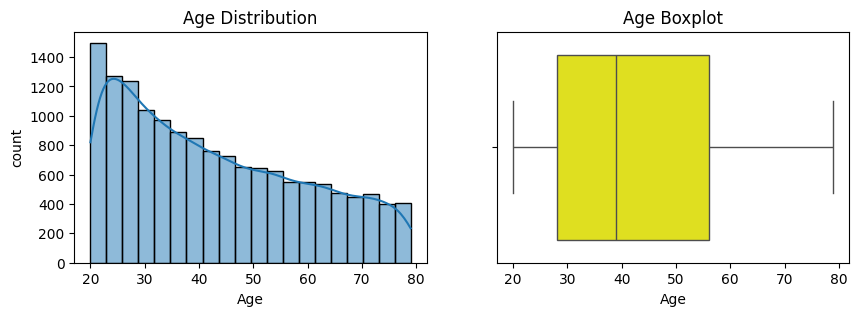

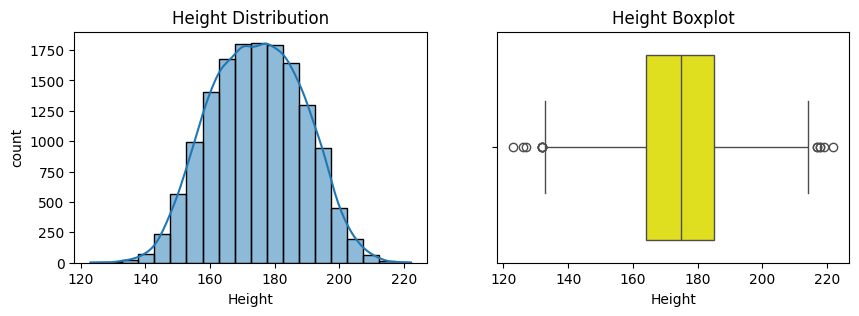

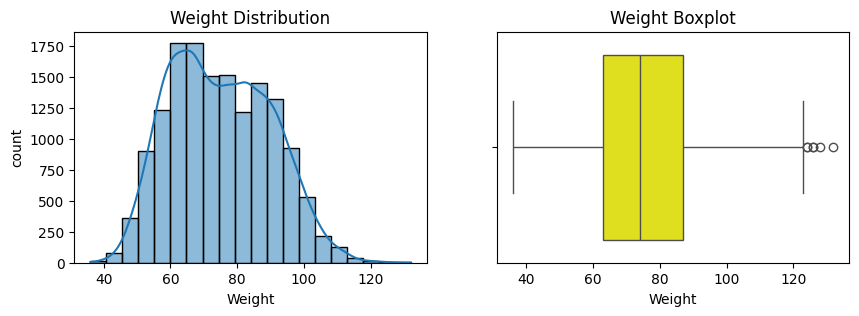

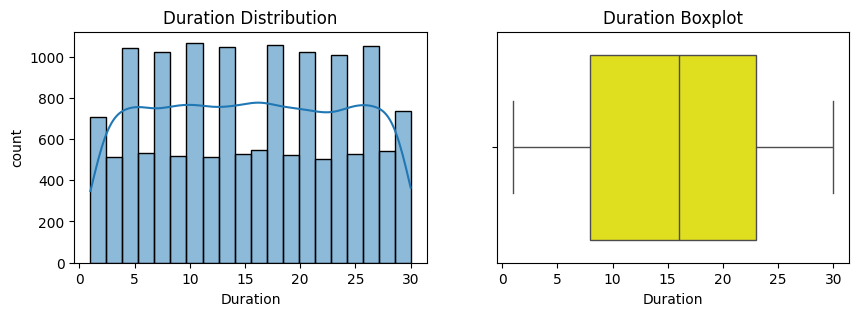

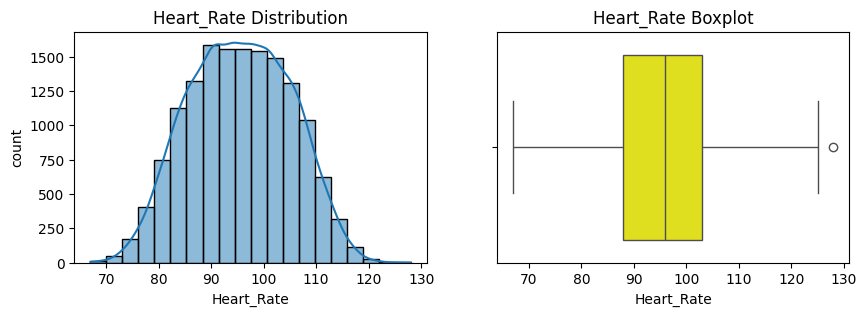

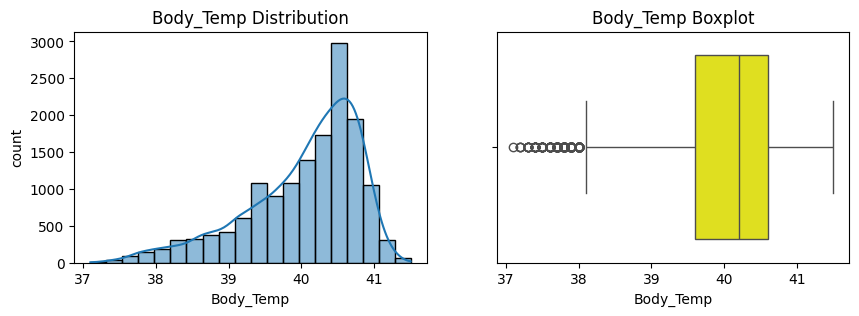

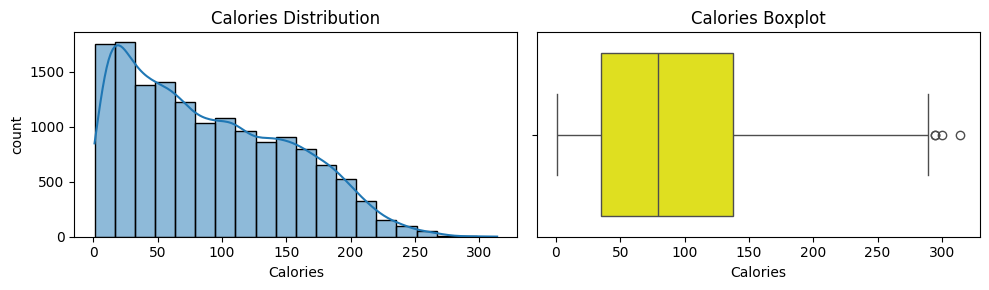

In [ ]:
#Loop through the  numerical columns
#Univariate

for col in num_col:
    #Histogram
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde =True,bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('count')

    #BOX PLOT
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col],color ='yellow')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

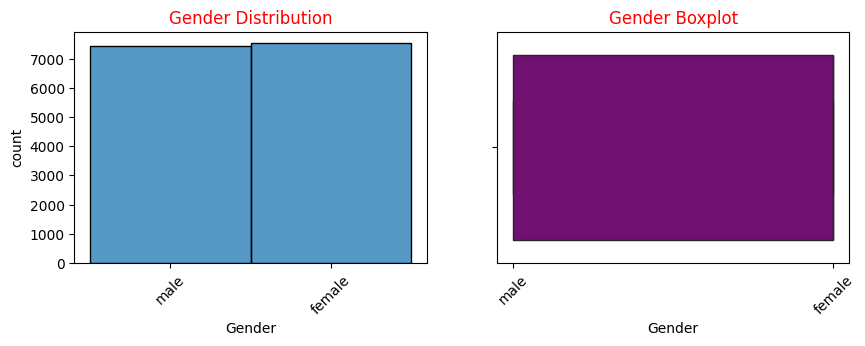

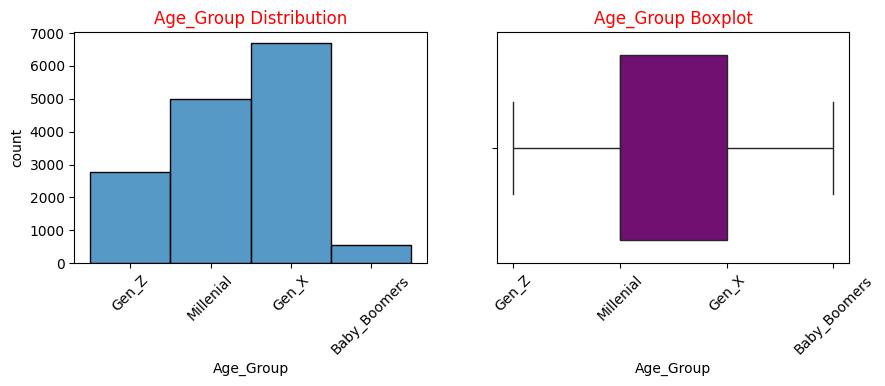

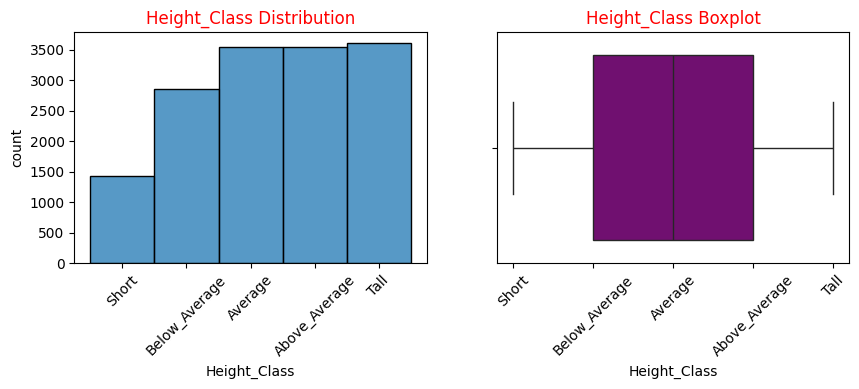

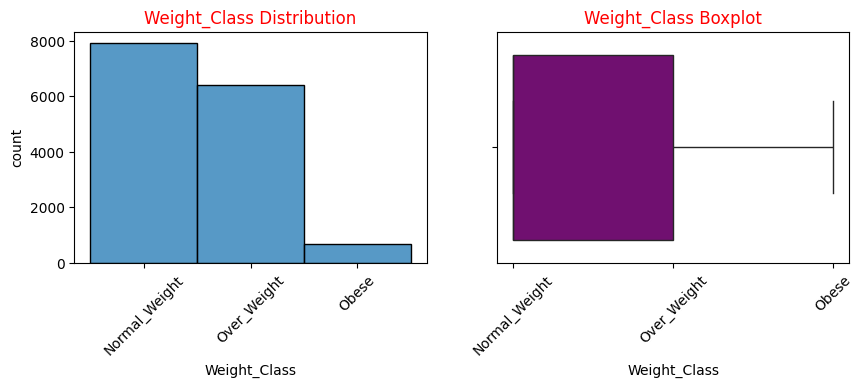

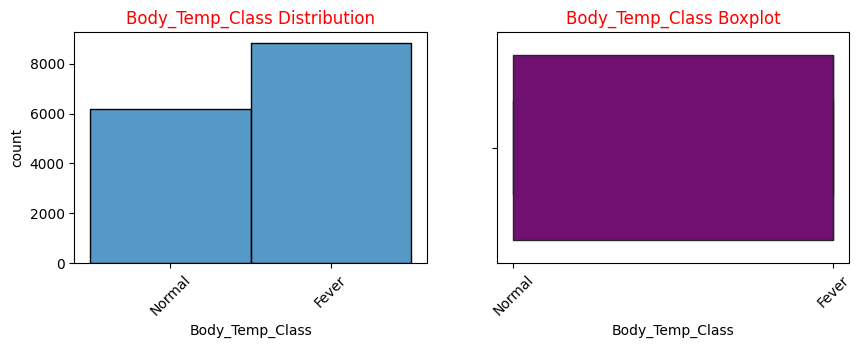

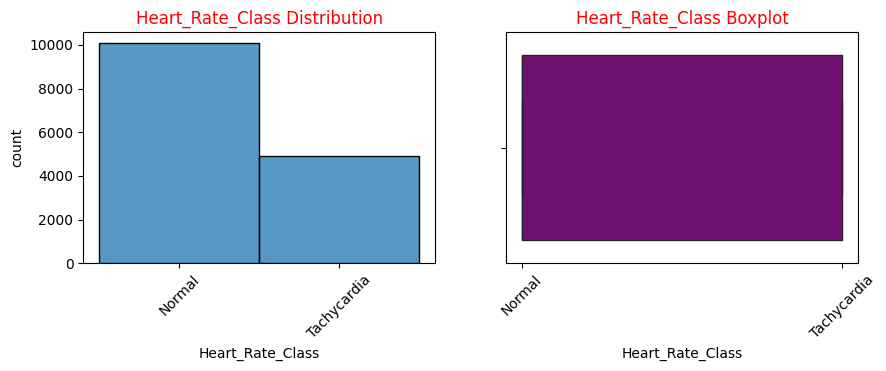

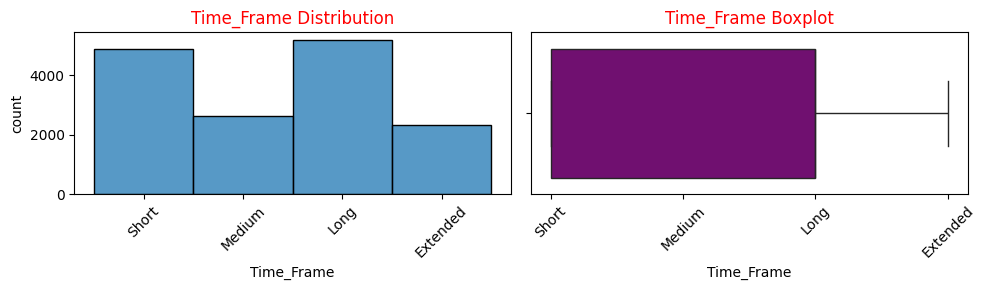

In [ ]:
#Loop through the  categorical columns
#Univariate

for col in cat_col:
    #Histogram
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[col],bins=20)
    plt.title(f'{col} Distribution',color ='red')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation =45)

    #BOX PLOT
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col],color ='purple')
    plt.title(f'{col} Boxplot',color='red')
    plt.xlabel(col)
    plt.xticks(rotation =45)

plt.tight_layout()
plt.show()

# Bivariate Analysis

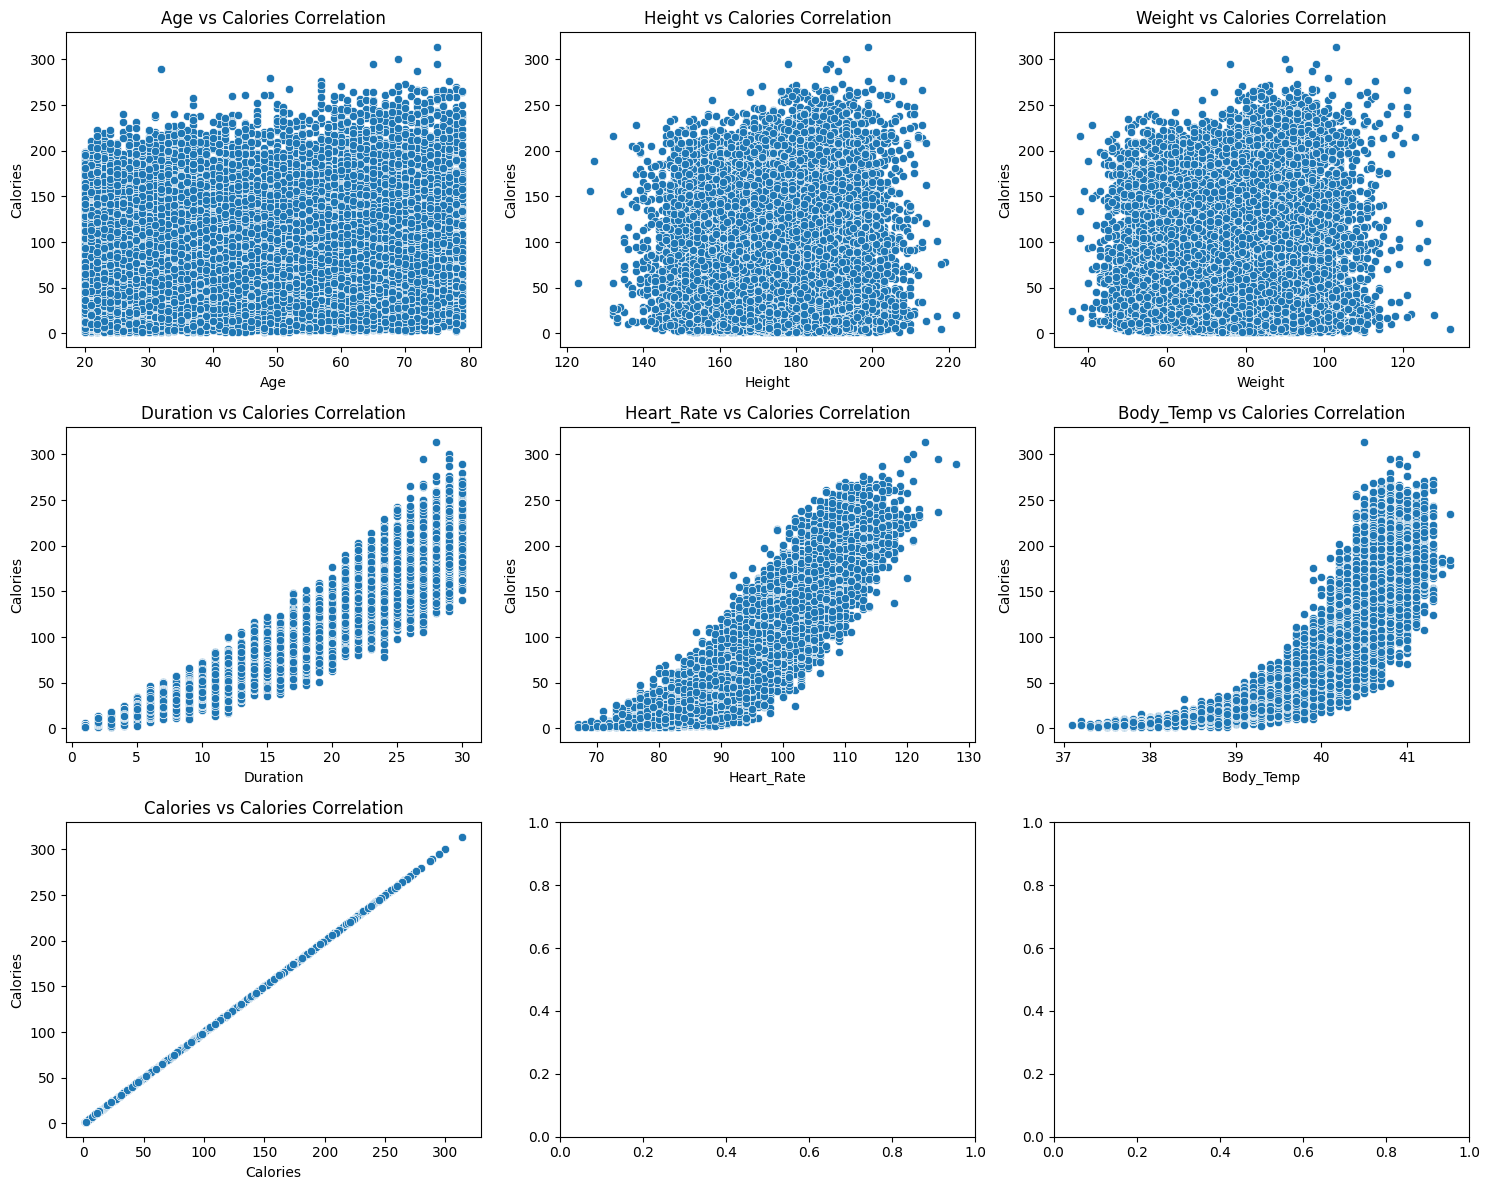

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
axis = axes.flatten()
for i,col in enumerate(num_col):
    sns.scatterplot(data=df, x=col,y='Calories',ax=axis[i])
    axis[i].set_title(f'{col} vs Calories Correlation')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

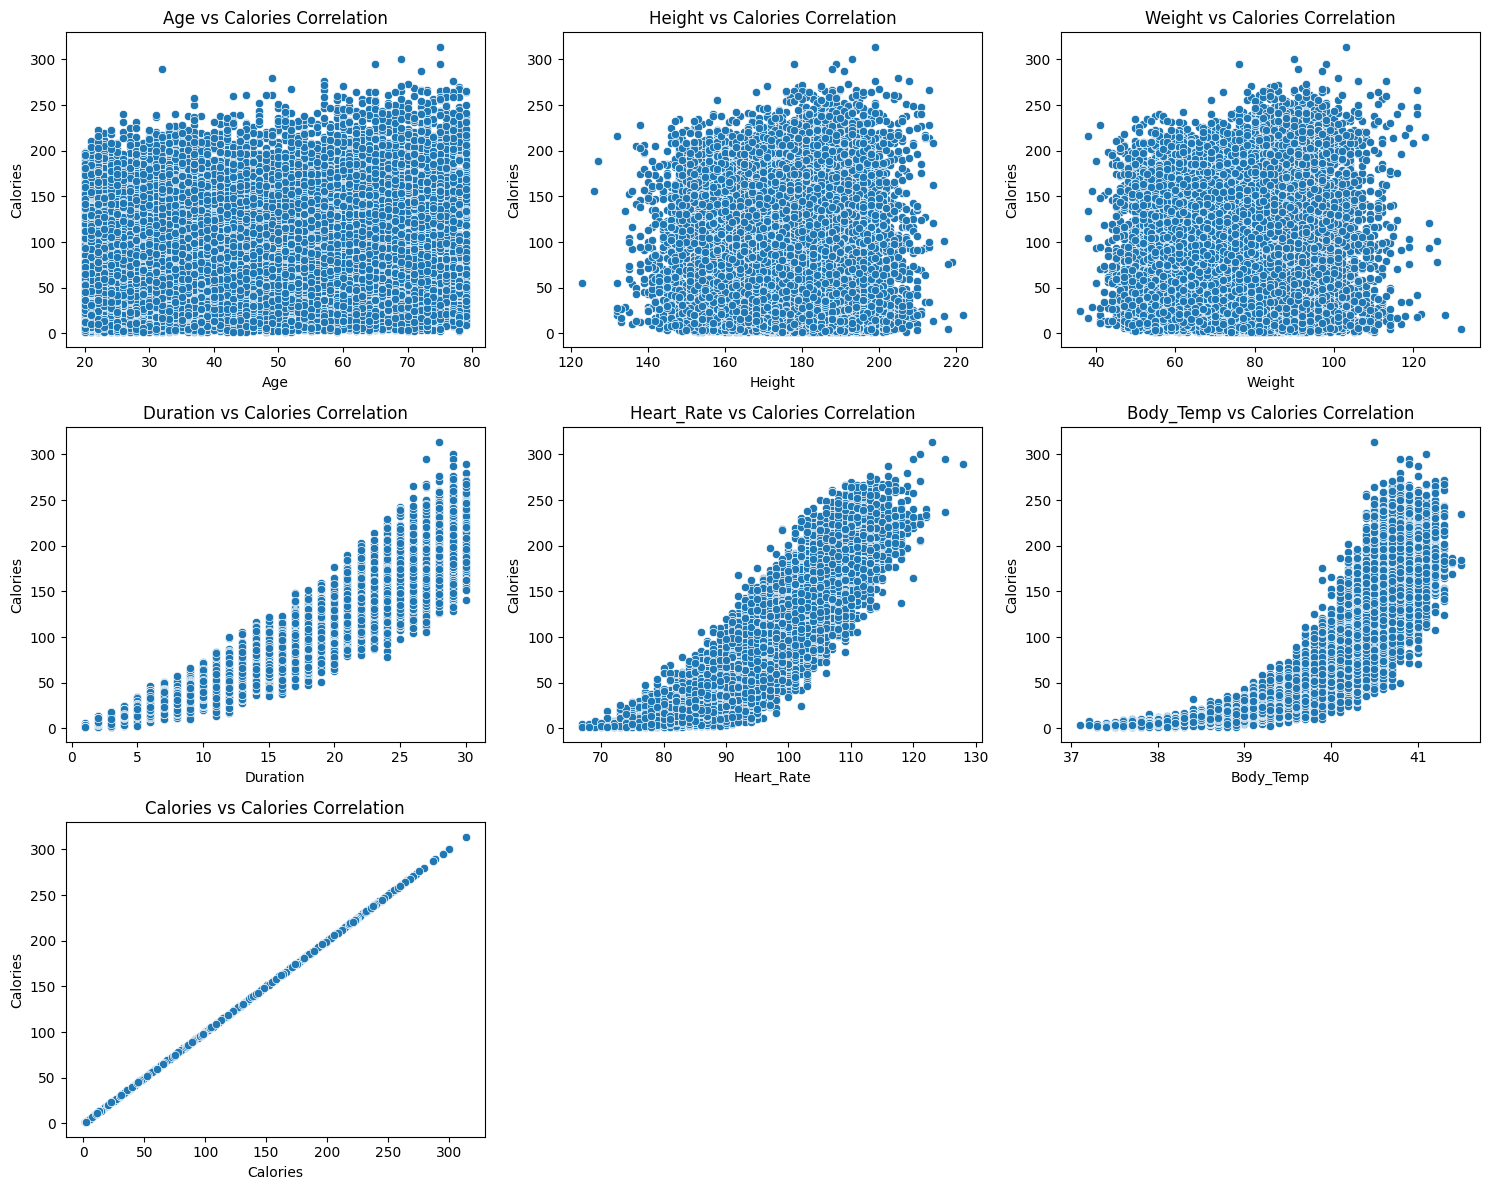

In [ ]:
#We will need to drop the last 2 graphs as they have no signficant

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
axis = axes.flatten()
for i,col in enumerate(num_col):
    sns.scatterplot(data=df, x=col,y='Calories',ax=axis[i])
    axis[i].set_title(f'{col} vs Calories Correlation')

for ax in range(len(num_col),len(axis)):
    fig.delaxes(axis[ax])
plt.tight_layout()
plt.show

# Correlation Matrix

In [ ]:
corr_matrix= df[num_col].corr()
corr_matrix

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


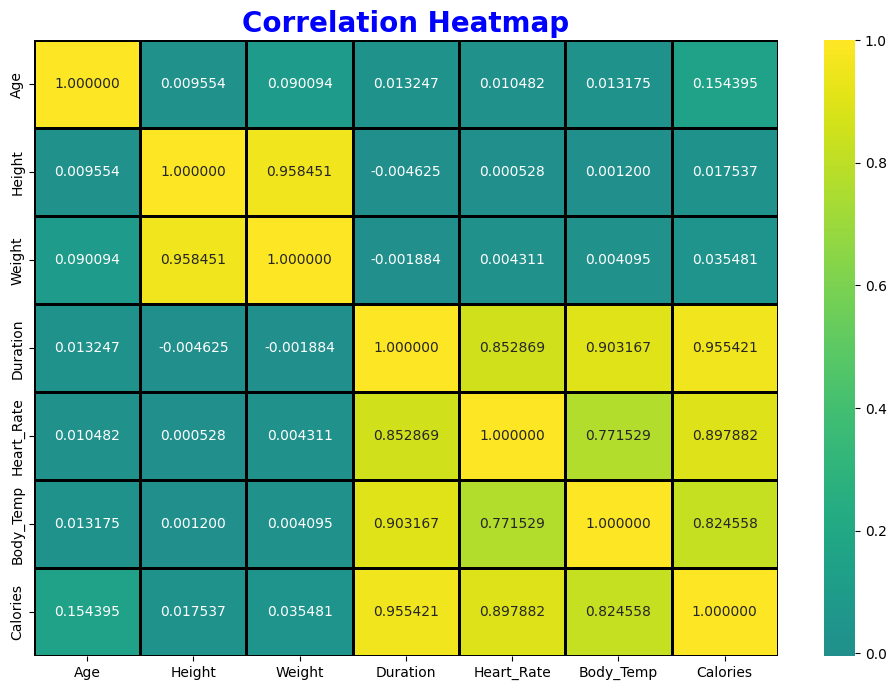

In [ ]:
#plotting the correlation Heatmap


plt.figure(figsize =(12,8))
sns.heatmap(corr_matrix,annot=True,fmt='2f',cmap='viridis',center=0,linewidth=1,linecolor='black')
plt.title('Correlation Heatmap',fontsize=20,color='blue',fontweight='bold')

plt.show()


In [ ]:
#Bivariate analysis for the Time_Frame vs Calories

df.groupby('Time_Frame')['Calories'].mean()

<ipython-input-37-e2c5d358c390>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Time_Frame')['Calories'].mean()


,Calories
Time_Frame,
Short,24.120640
Medium,63.611026
Long,120.145805
Extended,187.385573


In [ ]:
#Bivariate analysis for the Age_Group vs Calories

df.groupby('Age_Group')['Calories'].mean()

<ipython-input-38-477d1ca3ab09>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Calories'].mean()


,Calories
Age_Group,
Gen_Alpha,NaN
Gen_Z,78.181588
Millenial,83.625200
Gen_X,97.221408
Baby_Boomers,107.029144


<ipython-input-39-332d8fed70c5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Calories'].mean().plot(kind='bar')
<ipython-input-39-332d8fed70c5>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Time_Frame')['Calories'].mean().plot(kind='bar')


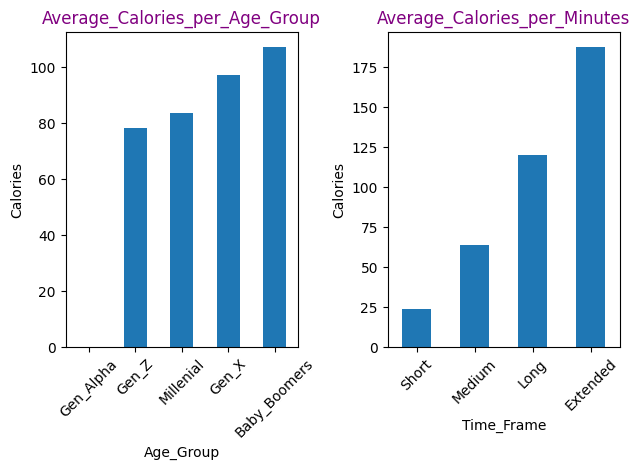

In [ ]:
plt.subplot(1,2,1)
df.groupby('Age_Group')['Calories'].mean().plot(kind='bar')
plt.xlabel('Age_Group')
plt.ylabel('Calories')
plt.title('Average_Calories_per_Age_Group',color='purple')
plt.xticks(rotation =45)

plt.subplot(1,2,2)
df.groupby('Time_Frame')['Calories'].mean().plot(kind='bar')
plt.xlabel('Time_Frame')
plt.ylabel('Calories')
plt.title('Average_Calories_per_Minutes',color='purple')
plt.xticks(rotation =45)

plt.tight_layout()

# Interpretation
From Calories vs Minutes spent exercising, we can say that the higher the time spen exercising, the high the amount of calories lost.
This also shows that the older people get,the more concious they are about their Health. From the graphs above, we can see that the Old people spend more time exercising than the younger people

## Data Spliting

In [ ]:
#Separate in to Feature and target variable
X =df.drop(columns =['Calories'])
y= df['Calories']

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(X,y,test_size=0.2, random_state=44)
encoder =OneHotEncoder(drop='first')

train_inputs.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Age_Group,Height_Class,Weight_Class,Body_Temp_Class,Heart_Rate_Class,Time_Frame
12115,female,29,161,62,24,106,40.4,Millenial,Below_Average,Normal_Weight,Fever,Tachycardia,Long
7005,female,20,161,65,6,92,39.3,Gen_Z,Below_Average,Normal_Weight,Normal,Normal,Short
5477,female,26,155,57,21,95,40.7,Millenial,Short,Normal_Weight,Fever,Normal,Long
11997,female,20,163,53,28,102,40.8,Gen_Z,Below_Average,Normal_Weight,Fever,Tachycardia,Extended
5984,male,79,170,75,18,95,40.6,Baby_Boomers,Average,Normal_Weight,Fever,Normal,Long


In [ ]:
train_cat =encoder.fit_transform(train_inputs[cat_col])
test_cat= encoder.transform(test_inputs[cat_col])

In [ ]:
#Scaling

scaler = StandardScaler()

In [ ]:
num_col=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

In [ ]:
train_num = scaler.fit_transform(train_inputs[num_col])
test_num = scaler.transform(test_inputs[num_col])

In [ ]:
#Merging the num_col and Cat_col

train_processed = np.hstack((train_num,train_cat.toarray()))
test_processed = np.hstack((test_num,test_cat.toarray()))

In [ ]:
train_processed

array([[-0.81643457, -0.94325608, -0.8628781 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.34649766, -0.94325608, -0.6643632 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.99312227, -1.36200022, -1.19373626, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.59829725,  0.17339497,  0.26203967, ...,  1.        ,
         0.        ,  0.        ],
       [-1.22870586,  0.17339497,  0.46055457, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.59706698,  0.17339497, -0.20116176, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
test_processed

array([[ 1.06823417, -0.66409331,  0.26203967, ...,  0.        ,
         0.        ,  1.        ],
       [-1.16980996, -2.05990712, -1.78928096, ...,  0.        ,
         0.        ,  1.        ],
       [-1.28760176,  0.6619298 , -0.20116176, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.22870586,  0.73172049,  0.7252411 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.28637149, -0.0359771 , -0.0688185 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.1847957 ,  1.22025533,  1.3207858 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
model = LinearRegression()

#Model Training

In [ ]:
model.fit(train_processed,train_target)

LinearRegression()

In [ ]:
train_prediction = model.predict(train_processed)
test_prediction = model.predict(test_processed)

#Model Evaluation

In [ ]:
train_mse = mean_squared_error(train_prediction,train_target)
test_mse =mean_squared_error(test_prediction,test_target)

train_mse,test_mse

(98.21695568509237, 103.95984042879994)

In [ ]:
train_score = r2_score(train_prediction,train_target)
test_score =r2_score(test_prediction,test_target)

train_mse,test_mse

(98.21695568509237, 103.95984042879994)

# Interpretation
The (train_mse) = 98.22 is the mean squared difference between the predicted and actual values for the training data.
The (test_mse) = 103.96 is the average squared difference between the predicted and actual values for the testing data.

The test mse (103.96) is higher than the train mse (98.22), this suggests that the model is overfitting to the training data.

In [ ]:
!git config --global user.email "chidichikere95@gmail.com"
!git config --global user.name "chizzymama"

In [ ]:
!git clone https://github.com/Chizzymama/Project-Predicting-Calories-Burnt-During-a-Workout-Session.git

Cloning into 'Project-Predicting-Calories-Burnt-During-a-Workout-Session'...


In [ ]:
!ls

Project-Predicting-Calories-Burnt-During-a-Workout-Session  sample_data


In [ ]:
!cp "Calories_Burnt.ipynb" Project-Predicting-Calories-Burnt-During-a-Workout-Session/

cp: cannot stat 'Calories_Burnt.ipynb': No such file or directory


In [ ]:
import os
for f in os.listdir():
    print(f)

.config
Project-Predicting-Calories-Burnt-During-a-Workout-Session
sample_data
